In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stcl

from stcl import load_centers

import pandas as pd
import os

%load_ext autoreload
%autoreload 2

In [9]:
dataset_name = 20180626
channel_name = "36c"
tap = 8

cluster = np.load("{}_tap{}_cov_classic_cluster_dim2/{}.npz".format(dataset_name, tap, channel_name))
# cluster = np.load("20180626_tap8_cov_classic_cluster_dim2/36c.npz")
#cluster = np.load("20180622_tap8_cov_classic_cluster_dim2/85b.npz")

sta = cluster['sta']
group_centers = cluster['group_centers']

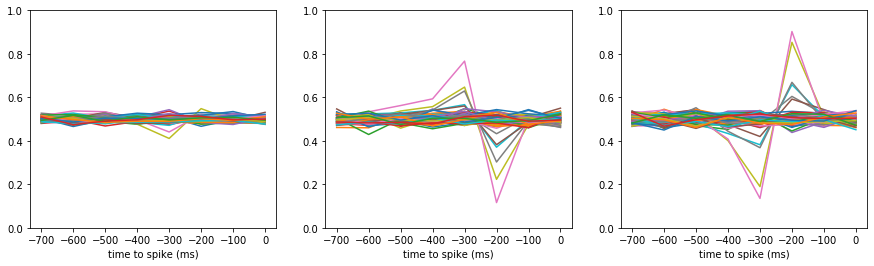

In [10]:
dt = 100

stcl.plot_temporal_profiles(sta, group_centers, tap, dt)

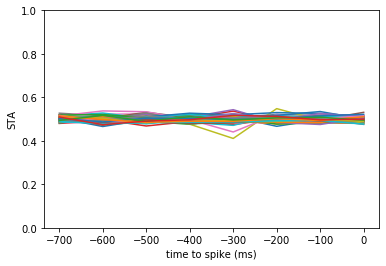

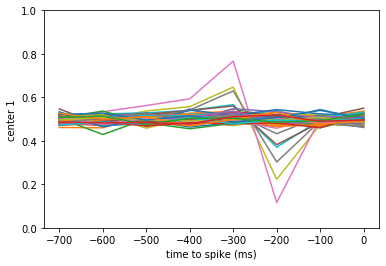

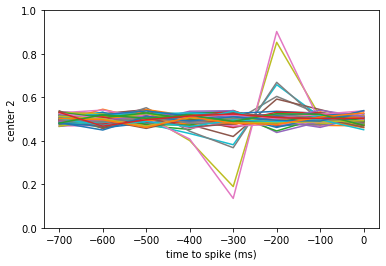

In [12]:
plt.figure(figsize=(6, 4))
pysta.plot_temporal_profile(sta, tap, dt)
plt.ylabel('STA')
plt.ylim(0,1)
plt.savefig("figure/{}_{}_sta_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_sta_temp.pdf".format(dataset_name, channel_name))

plt.figure(figsize=(6, 4))
pysta.plot_temporal_profile(group_centers[0], tap, dt)
plt.ylabel('center 1')
plt.ylim(0,1)
plt.savefig("figure/{}_{}_center1_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center1_temp.pdf".format(dataset_name, channel_name))

plt.figure(figsize=(6, 4))
pysta.plot_temporal_profile(group_centers[1], tap, dt)
plt.ylabel('center 2')
plt.ylim(0,1)
plt.savefig("figure/{}_{}_center2_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center2_temp.pdf".format(dataset_name, channel_name))

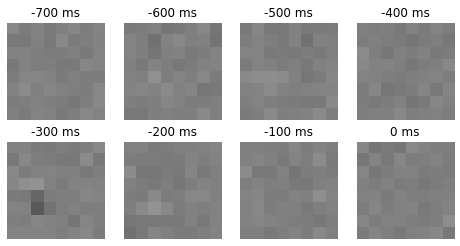

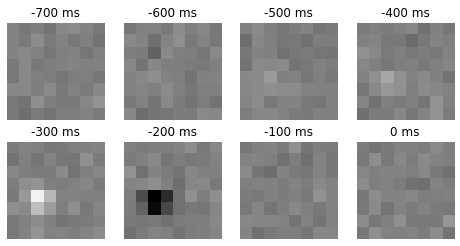

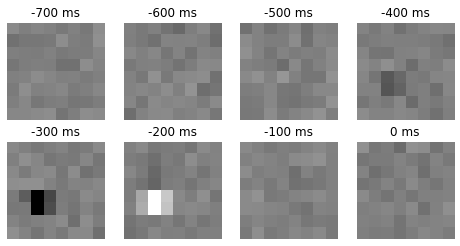

In [16]:
pysta.plot_stim_slices(sta, dt=dt)
plt.savefig("figure/{}_{}_sta.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_sta.pdf".format(dataset_name, channel_name))

pysta.plot_stim_slices(group_centers[0], dt=dt)
plt.savefig("figure/{}_{}_center1.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center1.pdf".format(dataset_name, channel_name))

pysta.plot_stim_slices(group_centers[1], dt=dt)
plt.savefig("figure/{}_{}_center2.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center2.pdf".format(dataset_name, channel_name))

## load clustered results

In [5]:
dataset_name = "20180626"

cell_info = pd.read_csv(os.path.join("data", dataset_name + "_cell_type.csv"))
cell_info["dataset_name"] = dataset_name
cell_info.head()

cluster_folder_name = dataset_name + "_tap8_cov_classic_cluster_dim2"
sta, center0, center1 = load_centers(cluster_folder_name, list(cell_info["channel_name"]))

In [6]:
sta.shape

(156, 8, 8, 8)

In [7]:
center0.shape

(156, 8, 8, 8)

In [8]:
center1.shape

(156, 8, 8, 8)

In [9]:
cell_info.shape

(156, 3)

## load and combine all datasets

In [10]:
def code_cell_type(cell_type):
    if cell_type == "ON":
        return 1
    elif cell_type == "OFF":
        return -1

    return np.nan

In [11]:
dim = 2
# dim = 3

stas = list()
centers0 = list()
centers1 = list()
cell_types = list()

cell_infos = list()

for dataset_name in ["20180618", "20180621", "20180626"]:
    
    print(dataset_name)
        
    cell_info = pd.read_csv(os.path.join("data", dataset_name + "_cell_type.csv"))
    cell_info["dataset_name"] = dataset_name
    cell_info.head()
    
    print(len(cell_info))

    cluster_folder_name = dataset_name + "_tap8_cov_classic_cluster_dim{}".format(dim)
    sta, center0, center1 = load_centers(cluster_folder_name, list(cell_info["channel_name"]))
    cell_type = [code_cell_type(c) for c in cell_info["cell_type"]]
    
    print(sta.shape, center0.shape, center1.shape)
    
    stas.append(sta)
    centers0.append(center0)
    centers1.append(center1)
    cell_types.append(cell_type)
    
    cell_infos.append(cell_info)
    
stas = np.concatenate(stas)    
centers0 = np.concatenate(centers0)
centers1 = np.concatenate(centers1)
cell_types = np.concatenate(cell_types)

cell_infos = pd.concat(cell_infos)

20180618
118
(118, 8, 8, 8) (118, 8, 8, 8) (118, 8, 8, 8)
20180621
115
(115, 8, 8, 8) (115, 8, 8, 8) (115, 8, 8, 8)
20180626
156
(156, 8, 8, 8) (156, 8, 8, 8) (156, 8, 8, 8)


In [12]:
stas.shape

(389, 8, 8, 8)

In [13]:
centers0.shape

(389, 8, 8, 8)

In [14]:
centers1.shape

(389, 8, 8, 8)

In [15]:
cell_types.shape

(389,)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([169.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  91.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

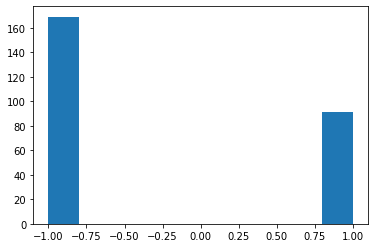

In [16]:
plt.hist(cell_types)

In [17]:
np.savez_compressed("clusters_dim{}".format(dim), stas=stas, centers0=centers0, centers1=centers1, cell_types=cell_types)

# reorder columns
# cell_infos.columns
cell_infos = cell_infos.reindex(columns=['dataset_name', 'channel_name', 'cell_type'])

cell_infos.to_csv("clusters_dim{}.csv".format(dim), index=None)

## test load

In [18]:
np.load("clusters_dim{}.npz".format(dim))["stas"].shape

(389, 8, 8, 8)

In [19]:
np.load("clusters_dim{}.npz".format(dim))["centers0"].shape

(389, 8, 8, 8)

In [20]:
np.load("clusters_dim{}.npz".format(dim))["centers1"].shape

(389, 8, 8, 8)

In [21]:
np.load("clusters_dim{}.npz".format(dim))["cell_types"].shape

(389,)

In [22]:
pd.read_csv("clusters_dim{}.csv".format(dim))

,dataset_name,channel_name,cell_type
0,20180618,12a,OFF
1,20180618,12b,ON
2,20180618,12c,unknown
3,20180618,13a,OFF
4,20180618,13b,ON
...,...,...,...
384,20180626,86c,ON
385,20180626,86d,ON
386,20180626,87a,OFF
387,20180626,87b,ON
